In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
np.random.seed(62)  # Set a random seed for reproducibility

# Generating the dataset
num_samples = 1000
num_features = 5

# Input features
X = np.random.randn(num_samples, num_features) 

# True coefficients
coefficients = np.random.randn(num_features)  

# True intercept
intercept = np.random.randn()  

# Target variable
y = np.dot(X, coefficients) + intercept 

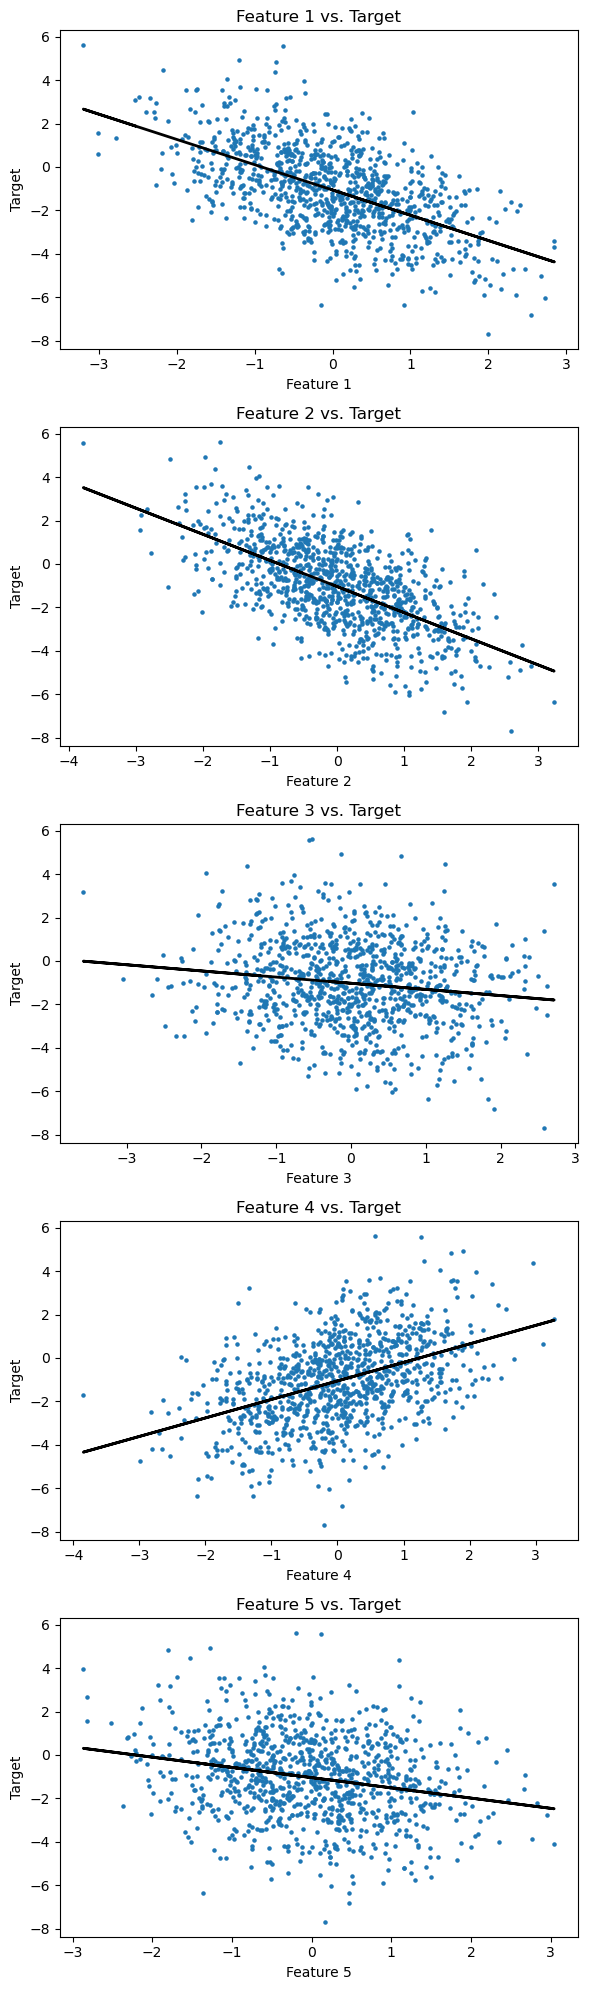

In [3]:
# Visualizing the data
fig, axs = plt.subplots(num_features, 1, figsize=(6, 4*num_features))

for i in range(num_features):
    axs[i].scatter(X[:, i], y, s=5)
    axs[i].set_xlabel(f"Feature {i+1}")
    axs[i].set_ylabel("Target")
    axs[i].set_title(f"Feature {i+1} vs. Target")

    # Compute and plot the best fit line
    best_fit_coeff = np.polyfit(X[:, i], y, deg=1)
    best_fit_line = np.poly1d(best_fit_coeff)
    axs[i].plot(X[:, i], best_fit_line(X[:, i]), color='black', linewidth=2)

plt.tight_layout()
plt.show()


In [4]:
from sklearn.datasets import make_classification

Text(0, 0.5, 'Feature 2')

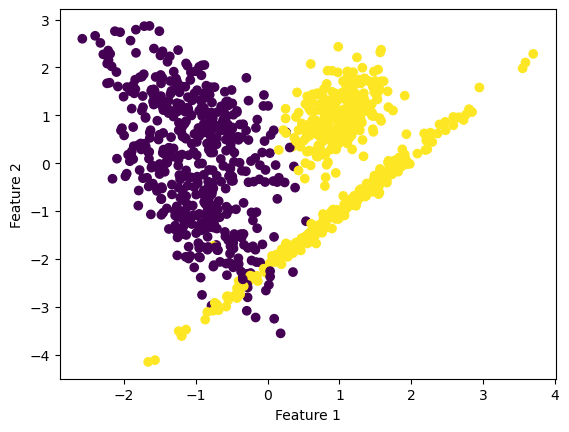

In [5]:
#Creating classification dataset and plotting it
X,y = make_classification(n_samples=1000,n_features=2,n_informative=2,n_redundant=0,n_classes=2,n_clusters_per_class=2)

plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')


In [6]:
from sklearn.datasets import make_blobs as mb
X,y = mb(n_samples=1000, centers=4, n_features=2)


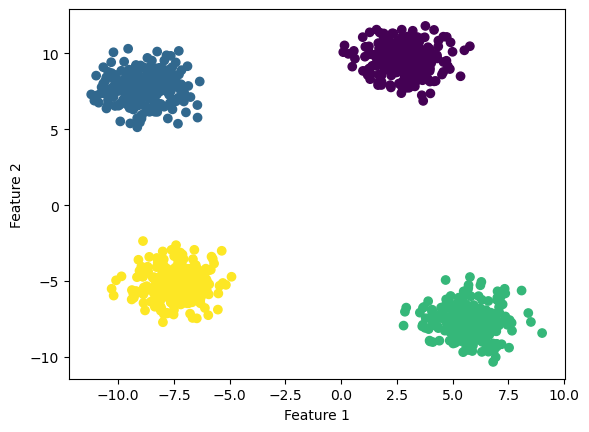

In [7]:
plt.scatter(X[:, 0],X[:,1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [12]:
import requests as req
url = ' https://www.worldometers.info/coronavirus/'
page= req.get(url)
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.text, 'lxml')
table = soup.find('table', id='main_table_countries_today')

headers = []
first_row=table.find('tr');

for i in first_row.find_all('th'):
 title = i.text
 headers.append(title)

headers

import pandas as pd
mydata = pd.DataFrame(columns = headers)
for j in table.find_all('tr', )[2:]:
 row_data = j.find_all('td')
 row = [i.text for i in row_data]
 length = len(mydata)
 mydata.loc[length] = row

 columns=['Country,Other','Continent','Population','TotalCases','NewCases','TotalDeaths','NewDeaths','TotalRecovered','NewRecovered','ActiveCases']
mydata=mydata[columns]
mydata.head()


,"Country,Other",Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases
0,\nAsia\n,Asia,,"217,322,003","+21,394","1,546,302",+15,"201,037,464","+18,437","14,738,237"
1,\nEurope\n,Europe,,"249,252,989",,"2,059,646",,"245,207,160","+7,736","1,986,183"
2,\nSouth America\n,South America,,"68,674,162",,"1,355,584",,"66,460,570",+47,"858,008"
3,\nOceania\n,Australia/Oceania,,"14,323,648",,"27,858",,"14,150,432",,"145,358"
4,\nAfrica\n,Africa,,"12,823,265",,"258,762",,"12,085,254",,"479,249"


Original Data: Counter({0: 945, 1: 55})


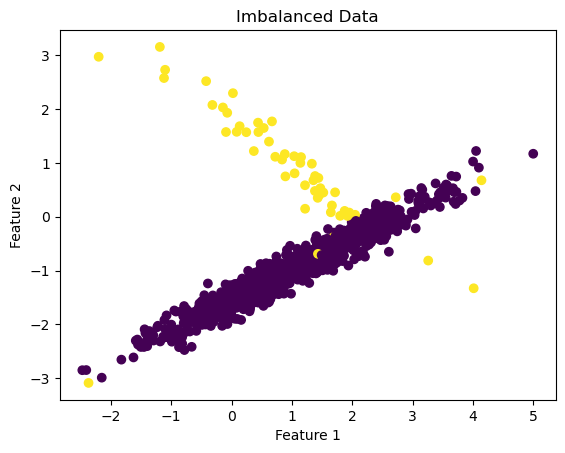

After Oversampling: Counter({0: 945, 1: 275})


<function matplotlib.pyplot.show(close=None, block=None)>

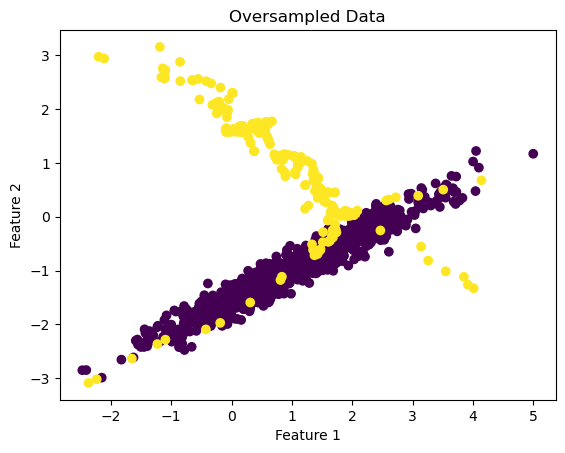

In [13]:
from numpy import where
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


X,y = make_classification(n_samples=1000,n_features=2,n_informative=2,n_redundant=0,n_classes=2,n_clusters_per_class=1, weights=[0.95,0.05],random_state=42)
counter = Counter(y)
print("Original Data:",counter)


plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Imbalanced Data")
plt.show()


oversample = SMOTE(sampling_strategy=0.292)
X_os, y_os = oversample.fit_resample(X, y)
counter = Counter(y_os)
print("After Oversampling:",counter)


plt.scatter(X_os[:,0],X_os[:,1],c=y_os)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Oversampled Data")
plt.show

In [11]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


iris = load_iris()

X = iris.data
y = iris.target


df = pd.DataFrame(X, columns=iris.feature_names)


print(df.head())


print(df.isnull().sum())


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


print("set dimensions:", X_train.shape)
print("set dimensions:", X_test.shape)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


X_test_scaled = scaler.transform(X_test)



   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64
set dimensions: (105, 4)
set dimensions: (45, 4)
